# Index
 - Download dataset
 - Sneak-Peak on dataset
 - Creating model
 - Compile model
 - Preprocessing data using keras 
 - Train or Fit model
 - Evaluating Model
 - Visualizing the training process
 - Save and load model
 - Test a single image

## Data collection / Download Dataset 


In [4]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip

--2020-12-24 11:24:03--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.76.48, 172.217.163.112, 172.217.163.144, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.76.48|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘cats_and_dogs_filtered.zip’

cats_and_dogs_filte 100%[===================>]  65.43M  4.74MB/s    in 14s     

2020-12-24 11:24:18 (4.56 MB/s) - ‘cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [5]:
!unzip -qq cats_and_dogs_filtered.zip

## Sneak-Peak on dataset / Data visualization

In [6]:
import os

base_dir = 'cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')

# Directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')

# Directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

In [7]:
train_cat_fnames = os.listdir(train_cats_dir)
print(train_cat_fnames[:5])

train_dog_fnames = os.listdir(train_dogs_dir)
train_dog_fnames.sort()
print(train_dog_fnames[:5])

['cat.167.jpg', 'cat.253.jpg', 'cat.278.jpg', 'cat.604.jpg', 'cat.390.jpg']
['dog.0.jpg', 'dog.1.jpg', 'dog.10.jpg', 'dog.100.jpg', 'dog.101.jpg']


In [8]:
print('total training cat images:', len(os.listdir(train_cats_dir)))
print('total training dog images:', len(os.listdir(train_dogs_dir)))
print('total validation cat images:', len(os.listdir(validation_cats_dir)))
print('total validation dog images:', len(os.listdir(validation_cats_dir)))

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500


For both cats and dogs, we have 1,000 training images and 500 test images.

Now let's take a look at a few pictures to get a better sense of what the cat and dog datasets look like. First, configure the matplot parameters:

In [9]:
import matplotlib.pyplot as plt
from matplotlib import image
import random

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

number_image_to_take = 4
cat_images = [os.path.join(train_cats_dir, file_name)
                for file_name in random.sample(os.listdir(train_cats_dir), number_image_to_take)]

dog_images = [os.path.join(train_dogs_dir, file_name)
                for file_name in random.sample(os.listdir(train_dogs_dir), number_image_to_take)]

print('cats:', cat_images)
print('dogs:', dog_images)
images = cat_images + dog_images
# print('total image', len(images))

cats: ['cats_and_dogs_filtered/train/cats/cat.803.jpg', 'cats_and_dogs_filtered/train/cats/cat.392.jpg', 'cats_and_dogs_filtered/train/cats/cat.70.jpg', 'cats_and_dogs_filtered/train/cats/cat.603.jpg']
dogs: ['cats_and_dogs_filtered/train/dogs/dog.583.jpg', 'cats_and_dogs_filtered/train/dogs/dog.265.jpg', 'cats_and_dogs_filtered/train/dogs/dog.208.jpg', 'cats_and_dogs_filtered/train/dogs/dog.23.jpg']


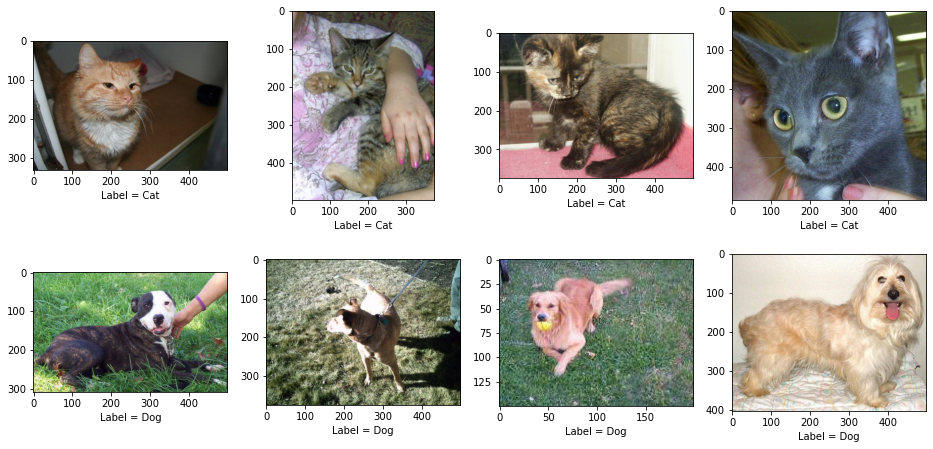

In [10]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

for i, img_path in enumerate(images):
    plt.subplot(nrows, ncols, i+1)
    img = image.imread(img_path)
    plt.imshow(img)
    
    if i < number_image_to_take:
        plt.xlabel('Label = Cat')
    else:
        plt.xlabel('Label = Dog')
    
plt.show()

## Creating model

In [11]:
from warnings import filterwarnings
filterwarnings('ignore')

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from keras.optimizers import Adam

model = Sequential()
model.add(Conv2D(32, (3,3), input_shape=(64,64,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=2)) # if stride not given it equal to pool filter size
model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=2))
model.add(Flatten())
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=2, activation='sigmoid'))

## Compile model

In [12]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

## Processing data using keras

In [13]:
from keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255, 
                                   shear_range=0.1,
                                   zoom_range=0.1,
                                   horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_dir,               # This is the source directory for training images
        target_size=(64, 64),  # All images will be resized to 150x150
        batch_size=32,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='categorical')

# Flow validation images in batches of 20 using test_datagen generator
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(64, 64),
        batch_size=32,
        class_mode='categorical')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


## Fit Model

In [19]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=50,  # 2000 images = batch_size * steps
      epochs=15,
      validation_data=validation_generator,
      validation_steps=30,  # 1000 images = batch_size * steps
      verbose=2)

Epoch 1/15
50/50 - 12s - loss: 0.5079 - accuracy: 0.7494 - val_loss: 0.6051 - val_accuracy: 0.6917
Epoch 2/15
50/50 - 12s - loss: 0.5127 - accuracy: 0.7532 - val_loss: 0.5831 - val_accuracy: 0.6948
Epoch 3/15
50/50 - 12s - loss: 0.4789 - accuracy: 0.7652 - val_loss: 0.5779 - val_accuracy: 0.7177
Epoch 4/15
50/50 - 13s - loss: 0.4557 - accuracy: 0.7917 - val_loss: 0.6009 - val_accuracy: 0.6917
Epoch 5/15
50/50 - 13s - loss: 0.4718 - accuracy: 0.7734 - val_loss: 0.5769 - val_accuracy: 0.6896
Epoch 6/15
50/50 - 13s - loss: 0.4331 - accuracy: 0.8030 - val_loss: 0.5717 - val_accuracy: 0.7188
Epoch 7/15
50/50 - 12s - loss: 0.4086 - accuracy: 0.8062 - val_loss: 0.6376 - val_accuracy: 0.7188
Epoch 8/15
50/50 - 12s - loss: 0.4149 - accuracy: 0.8119 - val_loss: 0.6044 - val_accuracy: 0.7333
Epoch 9/15
50/50 - 15s - loss: 0.3616 - accuracy: 0.8415 - val_loss: 0.6007 - val_accuracy: 0.7292
Epoch 10/15
50/50 - 15s - loss: 0.3522 - accuracy: 0.8497 - val_loss: 0.6406 - val_accuracy: 0.7083
Epoch 11/

## Evaluating Model

In [24]:
batch = next(validation_generator)
print('type of batch:', type(batch))
print('batch length:', len(batch))
print('type batch[0]:', type(batch[0]))
print('type batch[1]:', type(batch[1]))

print('shape batch[0]:', batch[0].shape)
print('shape batch[1]:', batch[1].shape)

# evaluate model
_, acc = model.evaluate_generator(validation_generator, steps=len(validation_generator), verbose=0)
print('Accuracy: %.3f' %(acc * 100.0))

type of batch: <class 'tuple'>
batch length: 2
type batch[0]: <class 'numpy.ndarray'>
type batch[1]: <class 'numpy.ndarray'>
shape batch[0]: (32, 64, 64, 3)
shape batch[1]: (32, 2)
Accuracy: 71.900


## Visualizing the training process

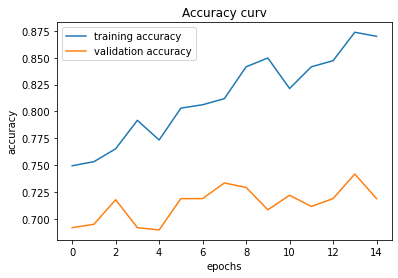

In [32]:
# Retrive a list of accuracy results on training and test data
# sets for each training epoch
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Retrive a list of list results on training and test data
# sets for each training epoch
loss = history.history['loss']
val_loss = history.history['val_loss']

# Get number of epochs
epochs = range(len(acc))

plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='validation accuracy')
plt.title('Accuracy curv')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()

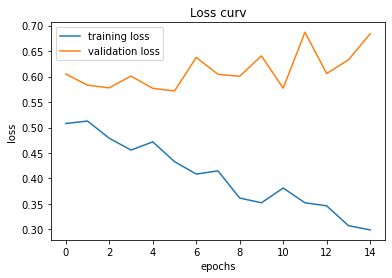

In [34]:
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.title('Loss curv')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

## Save and Load model

In [37]:
import os

model_name = 'cats_vs_dogs_clf.h5'
model.save(model_name)
print('model saved to', os.getcwd())
!ls -ltr

model saved to /home/nsl20/Desktop/Aminul(me)/Deep-Learning-Guide/DL-Intro/cat_vs_dog_clf
total 77332
drwxr-x--- 4 nsl20 nsl20     4096 Sep 23  2016 cats_and_dogs_filtered
-rw-rw-r-- 1 nsl20 nsl20 68606236 Mar 29  2018 cats_and_dogs_filtered.zip
drwxrwxr-x 2 nsl20 nsl20     4096 Dec 24 08:28 images
-rw-rw-r-- 1 nsl20 nsl20   764941 Dec 24 11:55 cat_vs_dog_cls.ipynb
-rw-rw-r-- 1 nsl20 nsl20  9800768 Dec 24 11:55 cats_vs_dogs_clf.h5


In [38]:
from keras.models import load_model

loaded_model = load_model(model_name)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 6272)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               802944    
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 2

## Test a sigle image

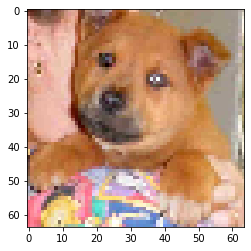

In [54]:
image_index = 8
test_image = batch[0][image_index]
plt.imshow(test_image)
plt.show()

In [55]:
test_image = test_image.reshape(1, 64, 64, 3)   # make image batch

pred = loaded_model.predict(test_image)         # prediction

print('pred           :', pred)
print('pred length    :', len(pred[0]))
best_prediction = pred.argmax()
print('best prediction:', best_prediction)

label = 'Cat' if best_prediction == 0 else 'Dog'
print('Label     = {} \nConfident = {}'.format(label, pred[0][best_prediction]))

pred           : [[0.15377337 0.8363633 ]]
pred length    : 2
best prediction: 1
Label     = Dog 
Confident = 0.8363633155822754
